# Customer Segmentation on Online Retail Data Using RFM Analysis 
## Reynara Ezra Pratama

## Background

Data retail online II berisi seluruh data transaksi retail non-toko yang berbasis di Inggris dan terdaftar yang terjadi pada tanggal 1 Desember 2009 s/d 9 Desember 2011. Perusahaan ini terutama menjual perlengkapan hadiah unik dan banyak pelanggan perusahaan adalah grosir. 

Dataset yang akan digunakan dalam melakukan *customer segmentation* dapat dilihat pada [link ini](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository)

## Business Understanding

1. Mendapatkan gambaran bisnis produk yang terjual pada tahun 2009-2010 dan 2010-2011.
2. Melakukan segmentasi pada *Customer* untuk melihat karakteristiknya.
3. Mengetahui rekomendasi yang dapat dilakukan setelah diketahui karakteristik *Customer*.

## Data Understanding

1. `Invoice` : Nomer invoice. 6 digit angka unik untuk setiap transaksi. Jika data diawali 'c', menandakan pembatalan.
2. `StockCode` : Kode produk. 5 digit angka unik untuk setiap produk.
3. `Description` : Penjelasan nama dari produk.
4. `Quantity` : Jumlah produk setiap transaksi.
5. `InvoiceDate` : Tanggal dan waktu dari Invoice.
6. `Price` : Harga unit.
7. `Customer ID` : Nomer *customer*. 5 digit angka untuk untuk setiap *customer*.
8. `Country` : Negara dimana *customer* berada.

## Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading Dataset

### Load Data From Github

In [2]:
# data_2009_2010 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202009-2010.csv')
# data_2010_2011 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202010-2011.csv')

### Load Data From Local File

In [3]:
data_2009_2010 = pd.read_csv('data_input\Year 2009-2010.csv', encoding='unicode_escape')
data_2010_2011 = pd.read_csv('data_input\Year 2010-2011.csv', encoding='unicode_escape')

## Checking Dataset

### Data 2009 - 2010

In [4]:
data_2009_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
data_2009_2010.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [6]:
data_2009_2010.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
268890,515409,37464,ROBOT MUG IN DISPLAY BOX,10,7/12/2010 12:24,1.25,16701.0,United Kingdom
329233,521488,22623,BOX OF VINTAGE JIGSAW BLOCKS,1,9/6/2010 13:42,11.02,NaN,United Kingdom
473648,534003,22941,CHRISTMAS LIGHTS 10 REINDEER,1,11/19/2010 14:27,8.50,17589.0,United Kingdom
67909,495391,84837,WHITE SWEETHEARTS CABINET 4 DRAWERS,1,1/24/2010 15:25,12.75,16206.0,United Kingdom
506664,536663,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,12/2/2010 12:07,0.55,16546.0,United Kingdom


### Data 2010 - 2011

In [7]:
data_2010_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
data_2010_2011.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [9]:
data_2010_2011.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135402,547895,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,1,3/28/2011 10:52,1.45,18118.0,United Kingdom
520048,580256,23581,JUMBO BAG PAISLEY PARK,3,12/2/2011 12:24,2.08,14688.0,United Kingdom
64405,541604,22955,36 FOIL STAR CAKE CASES,1,1/19/2011 17:23,2.10,14572.0,United Kingdom
114328,546008,22884,NUMBER TILE VINTAGE FONT 5,1,3/8/2011 15:43,4.13,NaN,United Kingdom
62953,541516,22209,WOOD STAMP SET HAPPY BIRTHDAY,2,1/18/2011 17:34,1.63,NaN,United Kingdom


## Data 2009 - 2010

In [10]:
df1 = data_2009_2010.copy()

### Check Characteristic Data

**Data Shape**

Kita akan mengecek ukuran dari data tahun 2009-2010 menggunakan atribut `.shape`

In [11]:
df1.shape

(525461, 8)

Terlihat data transaksi pada tahun 2009-2010 sejumlah 525461 baris dengan 8 buah kolom.

**Data Columns**

In [12]:
df1.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Data Info**

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Terdapat data yang kosong pada kolom tertentu saat dicek menggunakan metode `.info()`. Untuk data yang kita punya, diperoleh 2 kolom dengan tipe data *float*, 1 kolom dengan tipe data *integer*, dan 5 kolom dengan tipe data *object*.

**Descriptive Statistic**

In [14]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Saat kita melihat statistika deskriptif dari data tahun 2009-2010, diperoleh beberapa *insight* seperti :
1. Nilai maksimum untuk kolom `Quantity` adalah 19152, sementara nilai kuartil atasnya (Q3) adalah 10. Hal ini mengindikasikan terdapat suatu transaksi dengan total pembelian barang yang sangat banyak untuk satu kali transaksi.
2. Nilai maksimum untuk kolom `Price` adalah 25111,09, sementara nilai kuartil atasnya (Q3) adalah 4,21. Hal ini mengindikasikan terdapat suatu transaksi dengan total harga yang sangat banyak untuk satu kali transaksi.
3. Terdapat nilai negatif pada kolom `Quantity`. Hal ini dapat dicurigai pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).
4. Terdapat nilai negatif pada kolom `Price`. Hal ini juga dicurigain pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).

**Drop Invalid Data On Invoice**

Sebelumnya kita telah mengetahui bahwa huruf `'C'` pada kolom `Invoice` menandakan transaksi yang dibatalkan. Oleh karenanya, kita akan membuang data yang mempunyai huruf `'C'` pada kolom `Invoice`.

In [15]:
df1[df1['Invoice'].str.contains('C')].shape

(10206, 8)

Terlihat terdapat 10206 data yang menyatakan transaksi yang dibatalkan. 

In [16]:
df1 = df1[~df1['Invoice'].str.contains('C')]

In [17]:
df1.shape

(515255, 8)

Jumlah data setelah dibuang data transaksi yang dibatalkan adalah 515255.

**Check Null Data**

In [18]:
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

Dikarenakan kita tidak bisa menganalisis *customer* jika kolom `CustomerID` bernilai kosong, kita akan membuang data yang mempunyai nilai yang kosong.

In [19]:
df1 = df1.dropna()

In [20]:
df1.shape

(407695, 8)

Terlihat jumlah data setelah membuang data kosong sebanyak 407695.

**Check Duplicate Data**

Kita akan membuang data duplikat pada data.

In [21]:
df1 = df1.drop_duplicates(keep='first')

In [22]:
df1.shape

(400947, 8)

Terlihat jumlah data setelah membuang data duplikat adalah sebanyak 400947.

**Check Describe Again**

In [23]:
df1.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


Terlihat untuk kolom `Price`, masih terdapat data yang bernilai 0. Kita akan membuang data tersebut.

In [24]:
df1 = df1[df1['Price']>0]

**Drop Des 2010 Data**

Kita akan membuang data pada bulan Desember 2010 agar kita mempunyai data untuk 1 tahun dimulai dari Desember 2009 hingga November 2008.

In [25]:
df1.shape

(400916, 8)

In [26]:
df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64')

In [31]:
df1 = df1[df1['InvoiceDate']<'2010-12-01']

**Check Data Type**

In [32]:
df1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

**Check Number of Unique**

In [33]:
df1.nunique()

Invoice        18437
StockCode       4009
Description     4432
Quantity         337
InvoiceDate    17303
Price            442
Customer ID     4266
Country           37
dtype: int64

### Handle Outlier

In [34]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Boxplot in Quantity Columns**

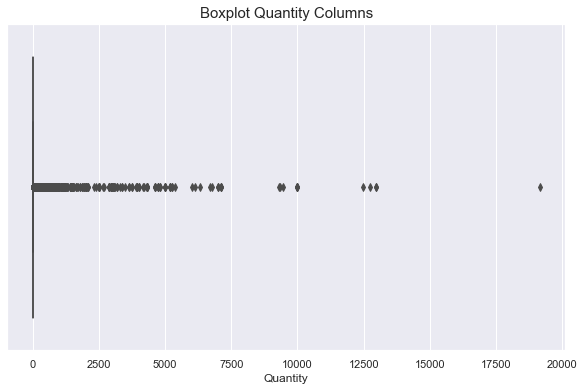

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Quantity'])
plt.title('Boxplot Quantity Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, terlihat untuk kolom `Quantity` mempunyai data outlier.

**Boxplot in Price Columns**

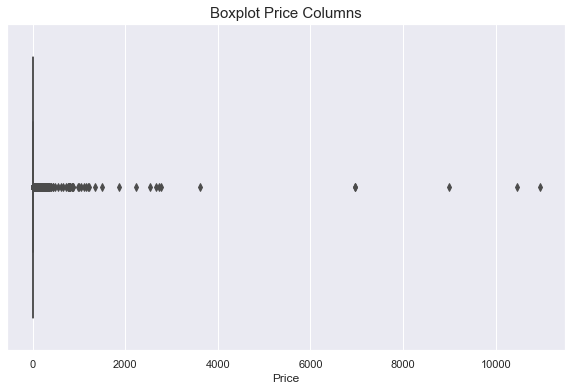

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Price'])
plt.title('Boxplot Price Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, kolom `Price` mempunyai data outlier.

**Remove Outlier Data From Quantity Columns**

In [47]:
q1_quantity = df1['Quantity'].quantile(0.25)
q3_quantity = df1['Quantity'].quantile(0.75)
IQR = q3_quantity - q1_quantity
min_quantity = q1_quantity - 1.5*IQR
max_quantity = q3_quantity + 1.5*IQR
print(f'Q1:{q1_quantity}')
print(f'Q3:{q3_quantity}')
print(f'IQR:{IQR}')
print(f'Min Quantity:{min_quantity}')
print(f'Max Quantity:{max_quantity}')

Q1:2.0
Q3:12.0
IQR:10.0
Min Quantity:-13.0
Max Quantity:27.0


In [48]:
df1 = df1[(df1['Quantity']<=max_quantity) & (df1['Quantity']>=min_quantity)]

In [49]:
df1.shape

(361229, 8)

**Remove Outlier Data From Price Columns**

In [50]:
q1_price = df1['Price'].quantile(0.25)
q3_price = df1['Price'].quantile(0.75)
IQR = q3_price - q1_price
min_price = q1_price - 1.5*IQR
max_price = q3_price + 1.5*IQR
print(f'Q1:{q1_price}')
print(f'Q3:{q3_price}')
print(f'IQR:{IQR}')
print(f'Min Price:{min_price}')
print(f'Max Price:{max_price}')

Q1:1.25
Q3:3.75
IQR:2.5
Min Price:-2.5
Max Price:7.5


In [51]:
df1 = df1[(df1['Price']<=max_price) & (df1['Price']>=min_price)]

In [52]:
df1.shape

(330139, 8)

### Exploratory Data Analysis (EDA)

**Number of Transaction Per Month**

In [53]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


## Data 2010 - 2011